## Bike sharing Case Study  
Problem Statement:  
#Bike-sharing company wants to know:  

#Which variables are significant in predicting the demand for shared bikes. #How well those variables describe the bike demands

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore') 

In [2]:
bike_org=pd.read_csv('Bike Sharing.csv')

In [3]:
bike_org.shape

(730, 16)

In [4]:
bike_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_org.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike_org.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##observations  
#1. Max number of bikes rentl bikes was 8714 of which 80% were from registered users  

## DATA CLEANING¶

In [7]:
100*(bike_org.isnull().sum()/len(bike_org)).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#observation   
#no null values

In [8]:
bike_org.nunique().sort_values(ascending=False)

instant       730
dteday        730
cnt           695
atemp         689
registered    678
windspeed     649
casual        605
hum           594
temp          498
mnth           12
weekday         7
season          4
weathersit      3
yr              2
holiday         2
workingday      2
dtype: int64

In [9]:
bike_new=bike_org.drop(['instant','dteday','casual','registered'],axis=1)

#observation  
#instant and dteday will not contribute to analysis   
#we have count which will be target variable ,casual and registered is not needed  

In [10]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## DATA PREPARATION¶

In [11]:
def category(x):
    if x == 0:
        return "clear"
    elif x == 1:
        return "mist"
    elif x == 2:
        return "snow"
    elif x == 3:
        return "rain"
    
bike_new.weathersit = bike_new.weathersit.apply(category)

In [12]:
def season(x):
    if x == 1:
        return "spring"
    elif x == 2:
        return "summer"
    elif x == 3:
        return "fall"
    elif x == 4:
        return "winter"
    
bike_new.season = bike_new.season.apply(season)

#season and weather will make sense as categorical variables

In [13]:
bike_new.yr = bike_new.yr.apply(lambda x : 2018 if x == 0 else 2019)

In [14]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,1,0,6,0,snow,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,1,0,0,0,snow,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,1,0,1,1,mist,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,1,0,2,1,mist,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,1,0,3,1,mist,9.305237,11.46350,43.6957,12.522300,1600


#since month weekday are not making sense, hence converting to categorical variable

In [15]:
bike_new['weekday']= bike_new['weekday'].map ({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [16]:
bike_new['mnth'] = bike_new['mnth'].map ({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
    

In [17]:
bike_new.shape

(730, 12)

In [18]:
bike_new.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,sat,0,snow,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,snow,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,mist,8.050924,9.47025,43.7273,16.636703,1349


## EDA

In [19]:
var_num_list=['temp','atemp','hum','windspeed','cnt']
var_cat_list=['season','mnth','holiday','weekday','weathersit']

In [20]:
bike_new[var_num_list].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


#observation  
#temp and atemp have strong corelation  
#temp has a +ve corelation with bike demand  
#windspeed has small -ve corelation with bike demand. 

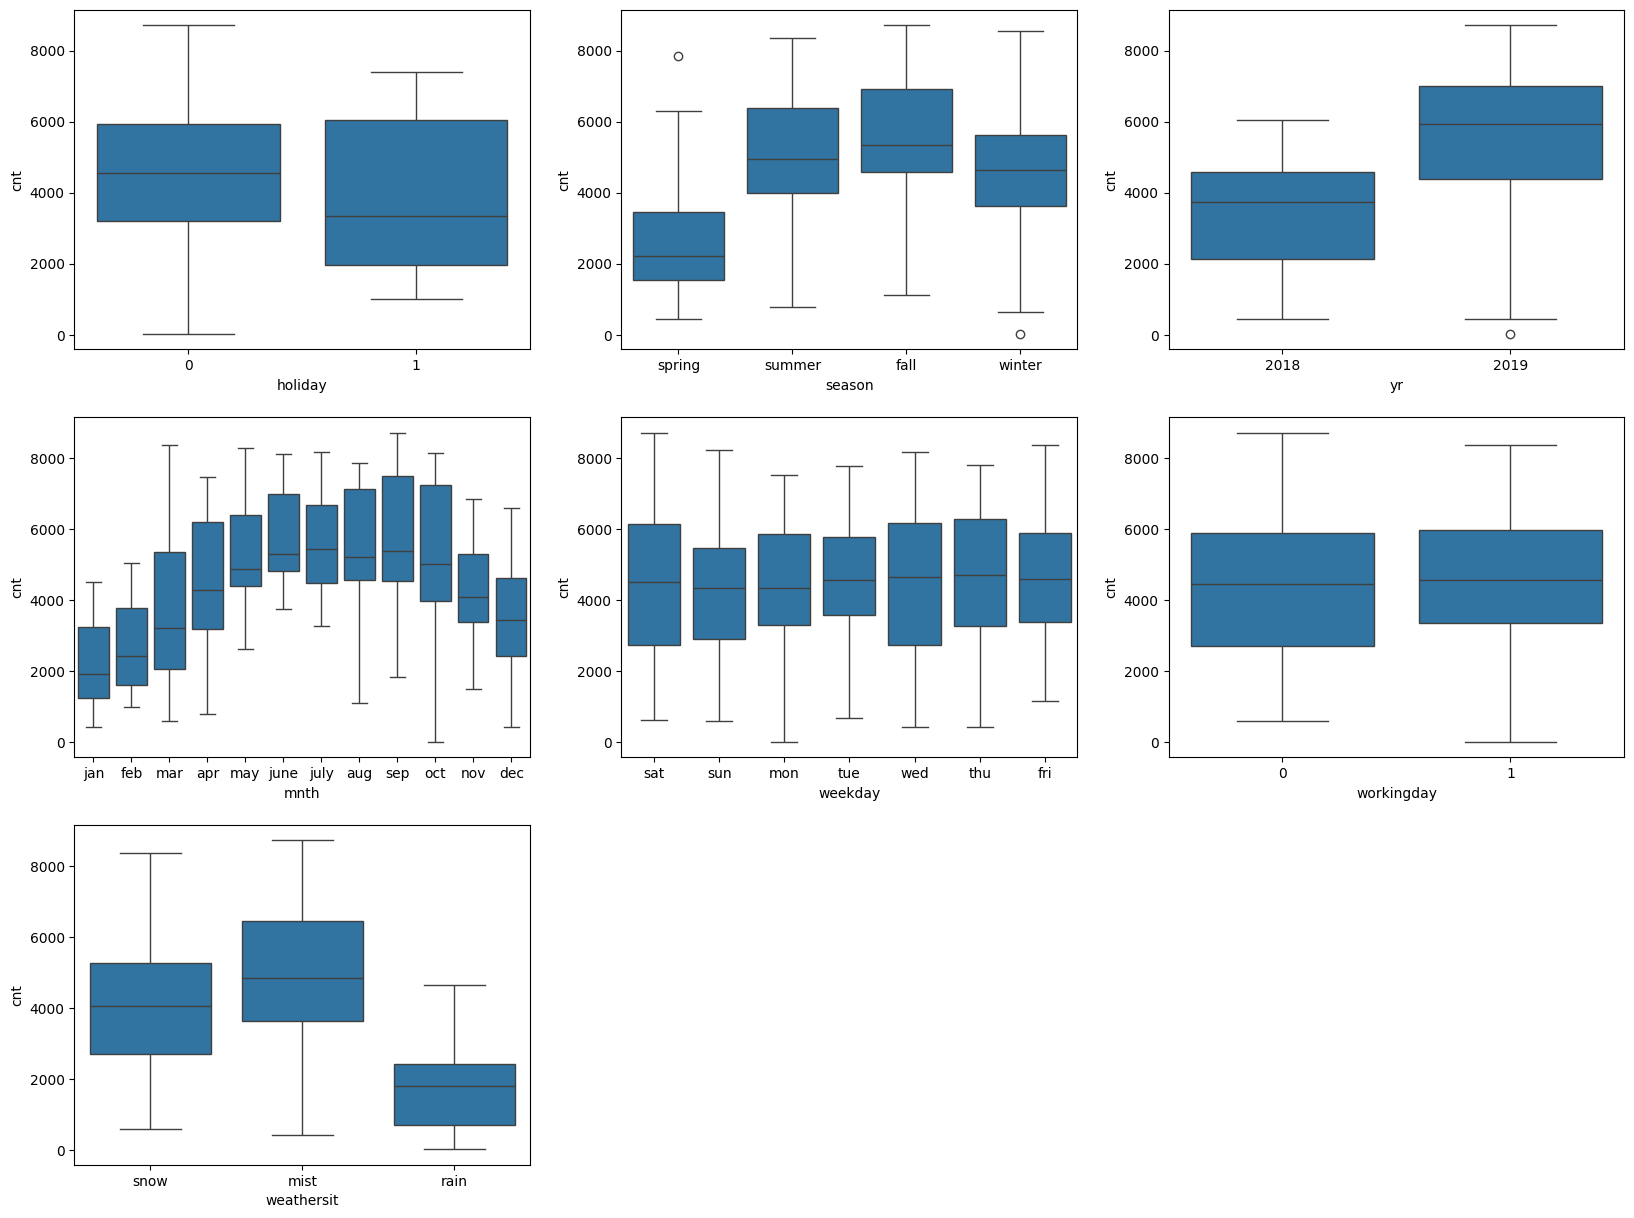

In [21]:
plt.figure(figsize=(20, 15))

plt.subplot(3, 3, 1)
sns.boxplot(x='holiday', y='cnt', data=bike_new)
plt.subplot(3, 3, 2)
sns.boxplot(x='season', y='cnt', data=bike_new)

plt.subplot(3, 3, 3)
sns.boxplot(x='yr', y='cnt', data=bike_new)

plt.subplot(3, 3, 4)
sns.boxplot(x='mnth', y='cnt', data=bike_new)

plt.subplot(3, 3, 5)
sns.boxplot(x='weekday', y='cnt', data=bike_new)

plt.subplot(3, 3, 6)
sns.boxplot(x='workingday', y='cnt', data=bike_new)

plt.subplot(3, 3, 7)
sns.boxplot(x='weathersit', y='cnt', data=bike_new)

plt.show()


#Observation  
#As expected the bike registrations are particularly low during rainy season and particularly high during(Summer and Fall) May-July months  
#The bike demand did not have much difference even if its working day or holiday or any particular day of week  
#The bike demand was higher in 2019 than 2018   
#There is a noticeable difference in the median bike rentals between holidays and non-holidays, but it is not substantial.

# Handling categorical to Dummy variable

In [22]:
bike_org_dummies = pd.get_dummies(bike_new, columns=['season', 'mnth', 'weekday', 'weathersit'], drop_first=True,dtype=int)

In [23]:
bike_org_dummies.yr = bike_org_dummies.yr.apply(lambda x : 0 if x == 2018 else 1)

In [24]:
bike_org_dummies.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_rain,weathersit_snow
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
bike_org_dummies.drop(['atemp'],axis=1,inplace=True)

In [26]:
bike_org_dummies.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_rain,weathersit_snow
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


#dropped unnecessary categorical variables (atemp as it is strongly corelated to temp)

# Split the data set

In [27]:
np.random.seed(0)
Bike_train,Bike_test=train_test_split(bike_org_dummies,train_size=0.7,random_state=100)

In [28]:
Bike_train.shape

(510, 29)

#Scalling feature to ensure correct range of features

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

In [31]:
var_num_list=['temp','hum','windspeed','cnt']
Bike_train[var_num_list] = scaler.fit_transform(Bike_train[var_num_list])

In [32]:
Bike_train[var_num_list].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


#Divide into X and Y set for model

In [33]:
y_train = Bike_train.pop('cnt')
X_train = Bike_train

In [34]:
X_train.shape

(510, 28)

In [35]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_rain,weathersit_snow
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

## RFE -Feature selection

In [37]:
lr=LinearRegression()

In [38]:
lr.fit(X_train,y_train)
#model fit on X and Y training data

LinearRegression()

In [39]:
rfe=RFE(lr,n_features_to_select = 10)
#feature selection

In [40]:
rfe=rfe.fit(X_train,y_train)

In [41]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 2),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 11),
 ('mnth_dec', False, 8),
 ('mnth_feb', False, 9),
 ('mnth_jan', False, 6),
 ('mnth_july', True, 1),
 ('mnth_june', False, 18),
 ('mnth_mar', False, 19),
 ('mnth_may', False, 10),
 ('mnth_nov', False, 7),
 ('mnth_oct', False, 17),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 13),
 ('weekday_sat', False, 4),
 ('weekday_sun', False, 12),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 14),
 ('weekday_wed', False, 16),
 ('weathersit_rain', True, 1),
 ('weathersit_snow', False, 3)]

In [42]:
cols=X_train.columns[rfe.support_]
#columns considered by RFE

In [43]:
X_train_rfe=X_train[cols]

In [44]:
import statsmodels.api as sm

In [45]:
#add constant

In [46]:
X_train_rfe=sm.add_constant(X_train_rfe)

In [47]:
X_train_rfe

,const,yr,holiday,temp,hum,windspeed,season_summer,season_winter,mnth_july,mnth_sep,weathersit_rain
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,1,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.679690,0.187140,0,0,0,0,0
53,1.0,0,0,0.202618,0.435939,0.111379,0,0,0,0,0
350,1.0,0,0,0.248216,0.577930,0.431816,0,1,0,0,0
79,1.0,0,0,0.462664,0.759870,0.529881,1,0,0,0,0


#Model building

## Model1

In [48]:
lr = sm.OLS(y_train, X_train_rfe).fit()#Running linear model
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Thu, 25 Jul 2024   Prob (F-statistic):          2.79e-186
Time:                        09:14:15   Log-Likelihood:                 494.18
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2682      0.026     10.292      0.000       0.217       0.319
yr                  0.2259      0.008     27.118      0.000       0.210       0.242
holiday            -0.0930      0.026     -3.543      0.000      -0.145      -0.041
temp                0.6200      0.023     27.492      0.000       0.576       0.664
hum                -0.2868      0.032     -9.045      0.000      -0.349      -0.224
windspeed          -0.2059      0.026     -7.889      0.000      -0.257      -0.155
season_summer       0.0800      0.011      7.281      0.000       0.058       0.102
season_winter       0.1390      0.011     12.903      0.000       0.118       0.160
mnth_july          -0.0482      0.018     -2.606      0.009      -0.085      -0.012
mnth_sep            0.0944      0.016      5.724      0.000       0.062       0.127
weathersit_rain    -0.1914      0.026     -7.470      0.000      -0.242      -0.141
==============================================================================
Omnibus:                       53.056   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.833
Skew:                          -0.655   Prob(JB):                     6.94e-21
Kurtosis:                       4.629   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

#Calculate VIF to be sure find out which vaiable  
#not needed

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
vif = pd.DataFrame()
X=X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.29
2,temp,9.29
4,windspeed,3.54
0,yr,2.02
5,season_summer,1.76
6,season_winter,1.68
7,mnth_july,1.55
8,mnth_sep,1.29
9,weathersit_rain,1.09
1,holiday,1.04


In [52]:
#COLUMN hum HAS A VERY HIGH VIF AND Small CORELATION WITH  temp SO WE DROP IT ,We tend to keep VIF equal to 5

In [53]:
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

#Model2

In [54]:
#add constant
X_train_rfe=sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_rfe).fit()#Running linear model
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.0
Date:                Thu, 25 Jul 2024   Prob (F-statistic):          4.42e-171
Time:                        09:14:15   Log-Likelihood:                 455.47
No. Observations:                 510   AIC:                            -890.9
Df Residuals:                     500   BIC:                            -848.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0840      0.018      4.794      0.000       0.050       0.118
yr                  0.2329      0.009     26.061      0.000       0.215       0.251
holiday            -0.0875      0.028     -3.094      0.002      -0.143      -0.032
temp                0.5854      0.024     24.438      0.000       0.538       0.632
windspeed          -0.1459      0.027     -5.365      0.000      -0.199      -0.092
season_summer       0.0750      0.012      6.346      0.000       0.052       0.098
season_winter       0.1228      0.011     10.731      0.000       0.100       0.145
mnth_july          -0.0313      0.020     -1.578      0.115      -0.070       0.008
mnth_sep            0.0822      0.018      4.640      0.000       0.047       0.117
weathersit_rain    -0.2524      0.027     -9.477      0.000      -0.305      -0.200
==============================================================================
Omnibus:                       60.888   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.629
Skew:                          -0.747   Prob(JB):                     3.14e-23
Kurtosis:                       4.625   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [56]:
vif = pd.DataFrame()
X=X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.96
3,windspeed,3.01
0,yr,2.00
4,season_summer,1.75
6,mnth_july,1.51
5,season_winter,1.43
7,mnth_sep,1.28
8,weathersit_rain,1.06
1,holiday,1.03


#model is ready as VIF < 5 for all variables

## Residual ANALYSIS

In [58]:
y_train_pred=lr.predict(sm.add_constant(X))

In [59]:
y_train_pred

576    0.724180
426    0.538633
728    0.363635
482    0.596066
111    0.305855
         ...   
578    0.795361
53     0.186350
350    0.289101
79     0.352516
520    0.690831
Length: 510, dtype: float64

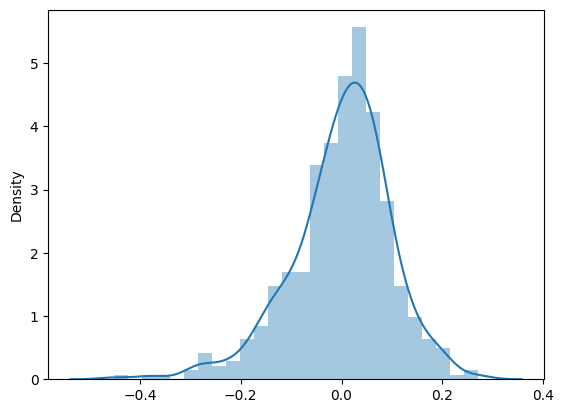

In [60]:
res=y_train-y_train_pred
sns.distplot(res)
plt.show()

#Making predictions

In [62]:
#var_num_list=['temp','hum','windspeed','cnt']
Bike_test[var_num_list] = scaler.transform(Bike_test[var_num_list])

In [63]:

y_test = Bike_test.pop('cnt')
X_test = Bike_test

In [64]:
Bike_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_rain,weathersit_snow
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.254545,0.263636,0.236364,0.059091,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.436599,0.441609,0.425817,0.236333,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
X_test=X_test[X.columns]

In [66]:
X_test.describe()

,yr,holiday,temp,windspeed,season_summer,season_winter,mnth_july,mnth_sep,weathersit_rain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.558718,0.313293,0.263636,0.236364,0.104545,0.086364,0.027273
std,0.500809,0.187620,0.233187,0.159584,0.441609,0.425817,0.306665,0.281541,0.163248
min,0.000000,0.000000,0.046591,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.198843,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.558172,0.300126,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.755981,0.402718,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.984424,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
X_test = sm.add_constant(X_test)

In [70]:
#Making predictions
y_test_pred=lr.predict(X_test)

In [71]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [72]:
#evaluate the model
from sklearn.metrics import r2_score

In [73]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7717629996668942

In [74]:
#r_squared on the test set is 0.805 and the r-squared on the trained set 0.7717
#which is quiet reasonable and nearly equal, which means that whatever data 
#the model was trained with, it has been almost able to apply those learnings in the test data.

# Model Evlauation

Text(0, 0.5, 'y_pred')

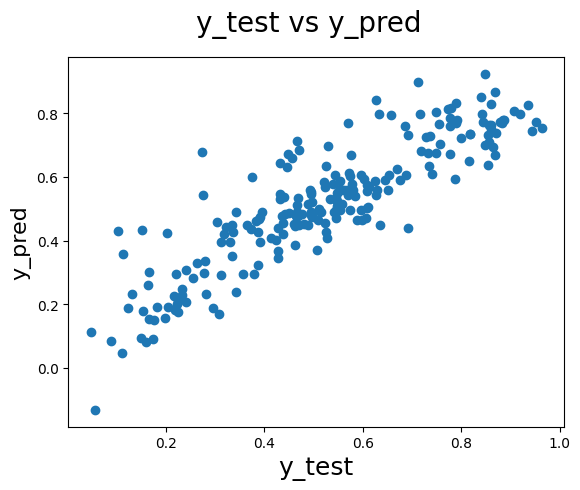

In [76]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [77]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.0
Date:                Thu, 25 Jul 2024   Prob (F-statistic):          4.42e-171
Time:                        13:02:53   Log-Likelihood:                 455.47
No. Observations:                 510   AIC:                            -890.9
Df Residuals:                     500   BIC:                            -848.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0840      0.018      4.794      0.000       0.050       0.118
yr                  0.2329      0.009     26.061      0.000       0.215       0.251
holiday            -0.0875      0.028     -3.094      0.002      -0.143      -0.032
temp                0.5854      0.024     24.438      0.000       0.538       0.632
windspeed          -0.1459      0.027     -5.365      0.000      -0.199      -0.092
season_summer       0.0750      0.012      6.346      0.000       0.052       0.098
season_winter       0.1228      0.011     10.731      0.000       0.100       0.145
mnth_july          -0.0313      0.020     -1.578      0.115      -0.070       0.008
mnth_sep            0.0822      0.018      4.640      0.000       0.047       0.117
weathersit_rain    -0.2524      0.027     -9.477      0.000      -0.305      -0.200
==============================================================================
Omnibus:                       60.888   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.629
Skew:                          -0.747   Prob(JB):                     3.14e-23
Kurtosis:                       4.625   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Coefficient of best fitted line  
#cnt=0.2329 * yr - (0.0875*holiday) + (0.5854*temp) - (0.1459*windspeed) + (0.0750 *summer) + (0.1228* winter) - (0.0313*july)+(0.0822*sep) -(0.2524 * rain)

In [78]:
#Conclusion  
#Model is able to predict with approx 80% accuracy  
#With an increase in temperature the demand also increases  
#temperature , season (Summer or winter) and month explain rise in demand  